# Data analysis for a  pharmacy supplies company

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Data Wrangling *1*</a></li>
<li><a href="#assessing1">Data Assessing *1*</a></li>
<li><a href="#cleaning">Data Cleaning</a></li> 
<li><a href="#assessing2">Data Assessing *2*</a></li>
<li><a href="#wrangling2">Data Wrangling *2*</a></li>    
</ul>


<a id='intro'></a>
## Introduction
 This data set contains 4 sheets of data from company working in the field of medical supplies
 
the products sheet columns :  DATE_ , ClintName , AccountId , ProductName , ProductId , CompanyId , CATEGORY1 , CATEGORY3 , InvoicesId , UnitSellPrice , ConsumerPrice , CostPrice , QTY.

the Proprties sheet columns : PROPRTIES_ID , PROPRTIES_NAME , PROPRTIES_TYPE.

the company sheet columns :	COP_ID , COP_NAME.

the account sheet columns :	CLIENT_NAME , CLIENT_ID , LOCATION_ID , LOCATION_NAME .


## In Products
category1 is the main category & category3 is the subcategory ids ... 
CompanyId is manufactureid , consumer price is the suggested selling price per piece ... which will give us a good point of view about the retailer sales .

## In Proprties
the proprties name is for both the category and subcategory and propeties type's job is to clarify the that it`s category or subcategory.

## In Companies 
the COP_NAME is the manufacture name

**Let's start**

### Question(s) for Analysis
The first step is to call the libraries see the head for each data ,the form of each the data ,The next step is to describe the data , display data information, key factor of data then we merge all the four sheets in one dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from matplotlib import pyplot as plt

df= pd.read_excel(r'C:\Users\abdel\Untitled Folder\Invoices and products.xlsx')
prop = pd.read_excel(r'C:\Users\abdel\Untitled Folder\proprties.xlsx')
comp = pd.read_excel(r'C:\Users\abdel\Untitled Folder\company.xlsx')
AccRegion = pd.read_excel(r'C:\Users\abdel\Untitled Folder\account & region.xlsx')

<a id='wrangling1'></a>
## Data Wrangling **1**

 In this section of the report, you will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties
The second step of the data path

**First we change all the coulmn names to lower cases**

In [2]:
df.columns= df.columns.str.lower()
df.columns

Index(['date_', 'clintname', 'accountid', 'productname', 'productid',
       'companyid', 'category1', 'category3', 'invoicesid', 'unitsellprice',
       'consumerprice', 'costprice', 'qty'],
      dtype='object')

In [3]:
prop.columns= prop.columns.str.lower()
prop.columns

Index(['proprties_id', 'proprties_name', 'proprties_type'], dtype='object')

In [4]:
comp.columns= comp.columns.str.lower()
comp.columns

Index(['cop_id', 'cop_name'], dtype='object')

In [5]:
AccRegion.columns= AccRegion.columns.str.lower()
AccRegion.columns

Index(['client_name', 'client_id', 'location_id', 'location_name'], dtype='object')

In [6]:
df.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31.0,1.0,26.0,3,4.31958,9.0,3.750000,24.0
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,4307,42.0,1.0,26.0,3,4.48166,8.0,3.500000,12.0
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31.0,1.0,7.0,3,7.75000,9.5,6.833000,6.0
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31.0,1.0,7.0,3,41.55833,55.0,33.006798,6.0
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31.0,1.0,7.0,3,41.55666,55.0,36.666000,3.0


In [7]:
df.shape

(523318, 13)

In [8]:
df.describe()

,accountid,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
count,523318.000000,523318.000000,520817.000000,522552.000000,487439.000000,523318.000000,523318.000000,523318.000000,523318.000000,523318.000000
mean,1412.515946,5916.807968,39.674907,1.480402,49.765981,24038.573082,22.358202,22.045283,20.038836,8.289315
std,711.945845,1216.952143,19.759017,2.297926,44.885647,14543.382508,32.834781,33.988589,32.373985,52.950912
min,141.000000,4181.000000,0.000000,1.000000,4.000000,3.000000,0.000000,0.000000,-134.860016,0.005000
25%,862.000000,5028.000000,31.000000,1.000000,16.000000,11236.000000,6.450000,5.500000,5.500000,1.000000
50%,1326.000000,5701.000000,33.000000,1.000000,39.000000,23471.000000,12.220000,13.000000,10.661362,2.000000
75%,2042.000000,6509.000000,51.000000,2.000000,70.000000,36380.000000,24.000000,26.000000,21.000000,5.000000
max,2764.000000,9710.000000,86.000000,167.000000,167.000000,50313.000000,1760.120000,1000.000000,8167.000000,15000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  int64         
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  int64         
 5   companyid      520817 non-null  float64       
 6   category1      522552 non-null  float64       
 7   category3      487439 non-null  float64       
 8   invoicesid     523318 non-null  int64         
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
df.nunique()

date_              611
clintname          898
accountid          898
productname       5222
productid         5256
companyid           79
category1            4
category3          140
invoicesid       47105
unitsellprice    12987
consumerprice      288
costprice        21407
qty                210
dtype: int64

## ***

In [11]:
prop.head()

,proprties_id,proprties_name,proprties_type
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


In [12]:
prop.shape

(167, 3)

In [13]:
prop.describe()

,proprties_id,proprties_type
count,167.00000,167.000000
mean,84.00000,0.311377
std,48.35287,1.480411
min,1.00000,-1.000000
25%,42.50000,-1.000000
50%,84.00000,-1.000000
75%,125.50000,2.000000
max,167.00000,2.000000


In [14]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   proprties_id    167 non-null    int64 
 1   proprties_name  167 non-null    object
 2   proprties_type  167 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [15]:
prop.nunique()

proprties_id      167
proprties_name    164
proprties_type      3
dtype: int64

In [16]:
prop['proprties_type'].value_counts()

-1    93
 2    71
 1     3
Name: proprties_type, dtype: int64

## ***

In [17]:
comp.head()

,cop_id,cop_name
0,1,تركيبات
1,50,بيندولين
2,2,سرنجات
3,3,بلاستر
4,51,بيور


In [18]:
comp.shape

(88, 2)

In [19]:
comp.describe()

,cop_id
count,88.000000
mean,44.500000
std,25.547342
min,1.000000
25%,22.750000
50%,44.500000
75%,66.250000
max,88.000000


In [20]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cop_id    88 non-null     int64 
 1   cop_name  88 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [21]:
comp.nunique()

cop_id      88
cop_name    87
dtype: int64

## ***

In [22]:
AccRegion.head()

,client_name,client_id,location_id,location_name
0,clint1639,1548,9,Region171
1,clint1641,1550,5,Region1-5
2,clint1646,1555,5,Region1-5
3,clint1647,1556,5,Region1-5
4,clint1651,1560,5,Region1-5


In [23]:
AccRegion.shape

(1384, 4)

In [24]:
AccRegion.describe()

,client_id,location_id
count,1384.000000,1384.000000
mean,1460.372110,41.761561
std,840.441257,27.997899
min,130.000000,1.000000
25%,621.750000,15.000000
50%,1434.000000,46.500000
75%,2204.250000,69.000000
max,2764.000000,87.000000


In [25]:
AccRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_name    1384 non-null   object
 1   client_id      1384 non-null   int64 
 2   location_id    1384 non-null   int64 
 3   location_name  1384 non-null   object
dtypes: int64(2), object(2)
memory usage: 43.4+ KB


In [26]:
AccRegion.nunique()

client_name      1384
client_id        1384
location_id        84
location_name      84
dtype: int64

## ***

<a id='assessing1'></a>
## Data Assessing **1**

**Problems we faced:**
<ol>
  <li>The format of the "ID" columns will change its type to <b>object</b></li>
  <li>category3 will be renamed t2 category2</li>
  <li>all the column names will be changed to lower case</li>
  <li>update the consumer price with 0 value and see if if there is a value > unitsellprice if there is we will replace it with (unitsellprice* 1.(mean diffrance between the consumer and sellprice for the products with higher consumer value)</li>
  <li>add colmuns for 1-unitprofit 2- totalsales 3- totalconsumersales 4- totalprofit 5- totalconsumerprofit 6- totaldifsales 7- totaldifprofit</li>
</ol> 


**These are the columns that we will be working on:**
<li>First,we will correct the wrong formats for each data frame</li>



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  int64         
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  int64         
 5   companyid      520817 non-null  float64       
 6   category1      522552 non-null  float64       
 7   category3      487439 non-null  float64       
 8   invoicesid     523318 non-null  int64         
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 51.9+ MB


In [28]:
#change accountid , productid and invoicesid to object 
df = df.astype({"accountid": str}, errors='raise')
df = df.astype({"productid": str}, errors='raise')
df = df.astype({"invoicesid": str}, errors='raise')

In [29]:
#fill null values with 0 for coulmns companyid , category1 and category3 in order to change them to int and then to object
df=df.fillna({'companyid':0,'category1':0,'category3':0})

In [30]:
#change to int
df = df.astype({'companyid':'int'})
df = df.astype({'category1':'int'})
df = df.astype({'category3':'int'})

In [31]:
#change to object
df = df.astype({"companyid": str}, errors='raise')
df = df.astype({"category1": str}, errors='raise')
df = df.astype({"category3": str}, errors='raise')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  object        
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  object        
 5   companyid      523318 non-null  object        
 6   category1      523318 non-null  object        
 7   category3      523318 non-null  object        
 8   invoicesid     523318 non-null  object        
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 51.9+ MB


In [33]:
df.describe()

,unitsellprice,consumerprice,costprice,qty
count,523318.000000,523318.000000,523318.000000,523318.000000
mean,22.358202,22.045283,20.038836,8.289315
std,32.834781,33.988589,32.373985,52.950912
min,0.000000,0.000000,-134.860016,0.005000
25%,6.450000,5.500000,5.500000,1.000000
50%,12.220000,13.000000,10.661362,2.000000
75%,24.000000,26.000000,21.000000,5.000000
max,1760.120000,1000.000000,8167.000000,15000.000000


## ***


<ol>
  <li>**Now as we fill null values in companies we want to know the values used in the products**</li>
  <li>**we need to take a look in the -2 values in properties may be we change it to type 2**</li>
<ol>    

In [34]:
df[ df['companyid'] == 0].count()

date_            0
clintname        0
accountid        0
productname      0
productid        0
companyid        0
category1        0
category3        0
invoicesid       0
unitsellprice    0
consumerprice    0
costprice        0
qty              0
dtype: int64

**replace -1 with 2 in prop dataframe then we check**

In [35]:
prop.replace({'proprties_type': {-1: 2}}, inplace=True)

In [36]:
prop['proprties_type'].value_counts()

2    164
1      3
Name: proprties_type, dtype: int64

In [37]:
prop.head()

,proprties_id,proprties_name,proprties_type
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


**now we merge the 4 dataframes in one data frame**

looks like we need to change the type to int for all the ids in the other dataframes

## ***

In [38]:
#change the type for proprties_id to object
prop = prop.astype({"proprties_id": str}, errors='raise')

In [39]:
df1=df.merge(prop, left_on='category1', right_on=('proprties_id'))

In [40]:
df2=df1.merge(prop, left_on='category3', right_on='proprties_id')

In [41]:
#change the type for cop_id to object
comp = comp.astype({"cop_id": str}, errors='raise')

In [42]:
df3=df2.merge(comp, left_on='companyid', right_on='cop_id')

In [43]:
#change the type for account_id to object
AccRegion = AccRegion.astype({"client_id": str}, errors='raise')

In [44]:
df4=df3.merge(AccRegion, left_on='accountid', right_on='client_id')

## ***

**now as we finished the merge and data types updateing .. let's check our new data and compre it with original**

In [45]:
df4.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-11,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,1279,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
2,2021-07-08,clint2042,1951,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,6987,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2021-07-08,clint2042,1951,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,6989,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2021-07-08,clint2042,1951,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,6988,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135


In [46]:
#the shape of data from the beginig and the end
print('this the shape for the new data{} .. and this is for the old one{} '.format(df4.shape , df.shape) ) 

this the shape for the new data(474345, 25) .. and this is for the old one(523318, 13) 


**there is 48937 row were lost for products without companies or categories**

In [47]:
df4.describe()

,unitsellprice,consumerprice,costprice,qty,proprties_type_x,proprties_type_y,location_id
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.0,474345.0,474345.000000
mean,21.385665,20.737837,19.175479,8.404366,1.0,2.0,36.235059
std,30.006782,29.545208,30.217196,39.377545,0.0,0.0,26.566866
min,0.000000,0.000000,-134.860016,0.250000,1.0,2.0,1.000000
25%,6.235000,5.500000,5.399889,1.000000,1.0,2.0,12.000000
50%,11.965000,12.000000,10.420588,2.000000,1.0,2.0,32.000000
75%,23.630000,25.000000,20.333000,5.000000,1.0,2.0,61.000000
max,595.040000,725.000000,8167.000000,3000.000000,1.0,2.0,87.000000


In [48]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474345 entries, 0 to 474344
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_             474345 non-null  datetime64[ns]
 1   clintname         474345 non-null  object        
 2   accountid         474345 non-null  object        
 3   productname       474345 non-null  object        
 4   productid         474345 non-null  object        
 5   companyid         474345 non-null  object        
 6   category1         474345 non-null  object        
 7   category3         474345 non-null  object        
 8   invoicesid        474345 non-null  object        
 9   unitsellprice     474345 non-null  float64       
 10  consumerprice     474345 non-null  float64       
 11  costprice         474345 non-null  float64       
 12  qty               474345 non-null  float64       
 13  proprties_id_x    474345 non-null  object        
 14  prop

In [49]:
df4.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-11,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,1279,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
2,2021-07-08,clint2042,1951,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,6987,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2021-07-08,clint2042,1951,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,6989,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2021-07-08,clint2042,1951,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,6988,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135


In [50]:
for i, v in enumerate(df4.columns):
    print(i, v)


0 date_
1 clintname
2 accountid
3 productname
4 productid
5 companyid
6 category1
7 category3
8 invoicesid
9 unitsellprice
10 consumerprice
11 costprice
12 qty
13 proprties_id_x
14 proprties_name_x
15 proprties_type_x
16 proprties_id_y
17 proprties_name_y
18 proprties_type_y
19 cop_id
20 cop_name
21 client_name
22 client_id
23 location_id
24 location_name


**Now we will drop the needed coulmns ( accountid, productid, companyid, category1, category3, proprties_id_x, proprties_type_x, proprties_id_y, proprties_type_y, cop_id, client_id and location_id) and rename the other coulmns to describtice names**

<a id='cleaning'></a>
## Data Cleaning
Second, we will delete the columns that are not necessary

In [51]:
#drop coulmns
df4.drop(['accountid', 'productid', 'companyid', 'category1', 'category3', 'proprties_id_x', 'proprties_type_x', 'proprties_id_y', 'proprties_type_y', 'cop_id', 'client_id' , 'location_id'],inplace = True , axis = 1)

In [52]:
df4.head()

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,proprties_name_x,proprties_name_y,cop_name,client_name,location_name
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135


In [53]:
#rename proprties_name_x ,proprties_name_y and cop_name
df4 = df4.rename(columns={"proprties_name_x": "category", "proprties_name_y": "subcategory", "cop_name": "manufacturer"})

In [54]:
df4.loc[(df4['consumerprice']  > df4['unitsellprice']),'c1'] = df4['consumerprice']- df4['unitsellprice']

In [55]:
df4.loc[(df4['consumerprice']  <= df4['unitsellprice']),'c1'] = 0

In [56]:
df4.head(1)

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,category,subcategory,manufacturer,client_name,location_name,c1
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.75,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042


In [57]:
df4 = df4.to_csv(r'C:\Users\abdel\Untitled Folder\readydata.csv')

In [58]:
ready = pd.read_csv(r'C:\Users\abdel\Untitled Folder\readydata.csv',index_col = 0)

In [59]:
nn = ready[ready['c1']>0]
nn['c1'].mean()

4.954212842567776

In [60]:
ready.loc[(ready['consumerprice']  <= ready['unitsellprice']),'consumerprice'] = ready['unitsellprice'] * 1.495

In [61]:
ready.describe()

,invoicesid,unitsellprice,consumerprice,costprice,qty,c1
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000
mean,23959.069694,21.385665,28.299692,19.175479,8.404366,4.332097
std,14550.912089,30.006782,40.370001,30.217196,39.377545,5.817865
min,3.000000,0.000000,0.001000,-134.860016,0.250000,0.000000
25%,11086.000000,6.235000,8.500000,5.399889,1.000000,1.325000
50%,23348.000000,11.965000,15.095763,10.420588,2.000000,2.890000
75%,36263.000000,23.630000,30.000000,20.333000,5.000000,5.370000
max,50313.000000,595.040000,725.000000,8167.000000,3000.000000,172.940000


In [62]:
ready[ready["consumerprice"]==0].count()

date_            0
clintname        0
productname      0
invoicesid       0
unitsellprice    0
consumerprice    0
costprice        0
qty              0
category         0
subcategory      0
manufacturer     0
client_name      0
location_name    0
c1               0
dtype: int64

**evey thing is good about the consumer price now**
**let's start a new data frame so we dont have to restart what we did 

In [63]:
ready[ready["consumerprice"]==0].count()[-1]

0

In [64]:
#df4.loc[(df4['consumerprice']  =0,'consumerprice'] = ready['unitsellprice'] * 1.495
ready[ready["unitsellprice"]==0].count()[-1]

8

In [65]:
#products with less selling price than the cost price
Lossproducts =  ready[ready["unitsellprice"] < ready["costprice"] ].count()[-1]
earnproducts = ready[ready["unitsellprice"] > ready["costprice"] ].count()[-1]
percofearn2loss = Lossproducts/earnproducts
print("This is the loss products count '{}' ,This is the earn products  count '{}' and the percentage between them is '{}' .".format(Lossproducts , earnproducts ,(round(percofearn2loss,4))))

This is the loss products count '9165' ,This is the earn products  count '464998' and the percentage between them is '0.0197' .


**Now we save the notebook again to reduce the delay time for the next steps as it's about to be ready**

<a id='assessing2'></a>
## Data Assessing **2**

In [66]:
ready.to_csv(r'C:\Users\abdel\Untitled Folder\readydata2.csv')

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
data = pd.read_csv(r'C:\Users\abdel\Untitled Folder\readydata2.csv',index_col = 0)

**Let's preview the data one more time to know what columns we need to add**

In [69]:
data.head()

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,category,subcategory,manufacturer,client_name,location_name,c1
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000


In [70]:
for i, v in enumerate(data.columns):
    print(i, v)


0 date_
1 clintname
2 productname
3 invoicesid
4 unitsellprice
5 consumerprice
6 costprice
7 qty
8 category
9 subcategory
10 manufacturer
11 client_name
12 location_name
13 c1


## Steps

<li>drop c1 , client_name columns & rename clintname to clientname
   <li>   change the sell and cost prices from with 0 to 0.001 & add 0.001 to the costprice ro products with with 0 profit 
<li>add new columns ( salestotal, consumertotalsales, salesgross, consumergross, sellermarkup%, consumermarkup%, salesmargin%,  consumermargin% )  
 

In [71]:
#drop with iloc
#data.drop(data.iloc[:,[26,27,],inplace = True , axis = 1)
data.drop(['c1','client_name'],inplace = True , axis = 1)
data = data.rename(columns={'location_name':'location','clintname':'client','invoicesid':'invoiceid','productname':'product','unitsellprice':'sellprice','costprice':'cost'})

In [72]:
data.describe()

,invoiceid,sellprice,consumerprice,cost,qty
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000
mean,23959.069694,21.385665,28.299692,19.175479,8.404366
std,14550.912089,30.006782,40.370001,30.217196,39.377545
min,3.000000,0.000000,0.001000,-134.860016,0.250000
25%,11086.000000,6.235000,8.500000,5.399889,1.000000
50%,23348.000000,11.965000,15.095762,10.420588,2.000000
75%,36263.000000,23.630000,30.000000,20.333000,5.000000
max,50313.000000,595.040000,725.000000,8167.000000,3000.000000


In [73]:
data.loc[(data['sellprice'] == 0) ,'sellprice'] = data['sellprice'] + 0.001
data.loc[(data['cost'] == 0) ,'cost'] = data['cost'] + 0.001
data.loc[((data['cost']) - (data['sellprice'])) == 0 ,'cost'] = data['cost'] + 0.001

In [74]:
data['salestotal']= data['sellprice']*data['qty']
data['consumertotalsales']= data['consumerprice']*data['qty']
data['salesgross']= (data['sellprice']*data['qty'])-(data['cost']*data['qty'])
data['consumergross']= (data['consumerprice']*data['qty'])-(data['sellprice']*data['qty'])

In [75]:
data['sellermarkup%'] = (data['salesgross']/(data['cost']*data['qty']))*100
data['consumermarkup%'] = (data['consumergross']/(data['salesgross']*data['qty']))*100

In [76]:
data['salesmargin%']= (data['salesgross']/data['salestotal'])*100
data['consumermargin%']= (data['consumergross']/data['consumertotalsales'])*100

In [77]:
#change invoiceid to object and date to datetime
data = data.astype({"invoiceid": str}, errors='raise')
data['date_'] = pd.to_datetime(data['date_'], format='%Y-%m-%d')

In [78]:
data['year'] = pd.DatetimeIndex(data['date_']).year
data['month'] = pd.DatetimeIndex(data['date_']).month

**Review our data**

In [79]:
data.head()

,date_,client,product,invoiceid,sellprice,consumerprice,cost,qty,category,subcategory,...,salestotal,consumertotalsales,salesgross,consumergross,sellermarkup%,consumermarkup%,salesmargin%,consumermargin%,year,month
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,...,103.66992,216.0,13.669920,112.33008,15.188800,34.238825,13.186004,52.004667,2020,5
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,...,103.66992,216.0,13.677593,112.33008,15.198622,34.219617,13.193406,52.004667,2020,5
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,...,13.19000,17.0,3.051000,3.81000,30.091726,124.877087,23.131160,22.411765,2021,7
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,...,13.19000,17.0,3.051200,3.81000,30.094296,124.868890,23.132679,22.411765,2021,7
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,...,13.19000,17.0,3.041978,3.81000,29.976072,125.247442,23.062762,22.411765,2021,7


**Rearrange our data set**

In [80]:
data = data.iloc[:, [0,20,21,1,2,3,8,9,10,11,4,5,6,7,12,14,16,18,13,15,17,19]]

In [81]:
for i, v in enumerate(data.columns):
    print(i, v)

0 date_
1 year
2 month
3 client
4 product
5 invoiceid
6 category
7 subcategory
8 manufacturer
9 location
10 sellprice
11 consumerprice
12 cost
13 qty
14 salestotal
15 salesgross
16 sellermarkup%
17 salesmargin%
18 consumertotalsales
19 consumergross
20 consumermarkup%
21 consumermargin%


**now let's look at our final data one more time before we start our visualization**

<a id='wrangling2'></a>
## Data Wrangling **2**

In [82]:
data.shape

(474345, 22)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474345 entries, 0 to 474344
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_               474345 non-null  datetime64[ns]
 1   year                474345 non-null  int64         
 2   month               474345 non-null  int64         
 3   client              474345 non-null  object        
 4   product             474345 non-null  object        
 5   invoiceid           474345 non-null  object        
 6   category            474345 non-null  object        
 7   subcategory         474345 non-null  object        
 8   manufacturer        474345 non-null  object        
 9   location            474345 non-null  object        
 10  sellprice           474345 non-null  float64       
 11  consumerprice       474345 non-null  float64       
 12  cost                474345 non-null  float64       
 13  qty                 474345 no

In [84]:
data.describe()

,year,month,sellprice,consumerprice,cost,qty,salestotal,salesgross,sellermarkup%,salesmargin%,consumertotalsales,consumergross,consumermarkup%,consumermargin%
count,474345.00000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,4.743450e+05,4.743450e+05,474345.000000,474345.000000,4.743450e+05,474345.000000
mean,2020.75241,6.726659,21.385665,28.299692,19.175479,8.404366,48.271941,5.050833,2.015190e+02,-4.792501e+01,66.468524,18.196583,-1.235978e+05,25.695544
std,0.64552,3.405752,30.006782,40.370001,30.217196,39.377545,60.156582,24.314091,3.520246e+04,2.290617e+04,86.694499,30.389495,4.418624e+07,9.835770
min,2020.00000,1.000000,0.001000,0.001000,-134.860016,0.250000,0.001000,-8158.530000,-2.143761e+03,-1.312072e+07,0.001000,0.000000,-6.494617e+09,0.000000
25%,2020.00000,4.000000,6.235000,8.500000,5.399889,1.000000,16.800000,1.587653,7.578182e+00,7.047101e+00,23.000000,5.200000,5.556546e+01,18.958375
50%,2021.00000,7.000000,11.965000,15.095762,10.420588,2.000000,30.000000,3.116663,1.124608e+01,1.010959e+01,40.000000,9.180000,1.277548e+02,22.555556
75%,2021.00000,10.000000,23.630000,30.000000,20.333000,5.000000,55.080000,6.072928,1.853361e+01,1.564272e+01,75.000000,18.470000,2.614855e+02,33.110368
max,2022.00000,12.000000,595.040000,725.000000,8167.000000,3000.000000,3500.250000,2502.474871,1.190090e+07,1.636223e+03,5232.873750,1732.623750,1.660683e+10,99.999091


In [85]:
data.nunique()

date_                   609
year                      3
month                    12
client                  781
product                4148
invoiceid             43031
category                  3
subcategory             137
manufacturer             77
location                 80
sellprice             11099
consumerprice          1884
cost                  19881
qty                     146
salestotal            14024
salesgross            91454
sellermarkup%         68249
salesmargin%          67885
consumertotalsales     3286
consumergross         13493
consumermarkup%       98659
consumermargin%       11850
dtype: int64

<li> so far we lost 2 dates , 117 clinet , 1074 products ,2 manufacturer , 1 category , 3 subcategories , 4074 invoice 
<li> so there are 1074 product that dont have manufacturer name , category name or subcatergory name & were sold in 4074 invoice with 117 clinet
<li>  and 8 coulmns were added  

In [86]:
#data.to_csv(r'C:\Users\abdel\Untitled Folder\readydata3.csv')

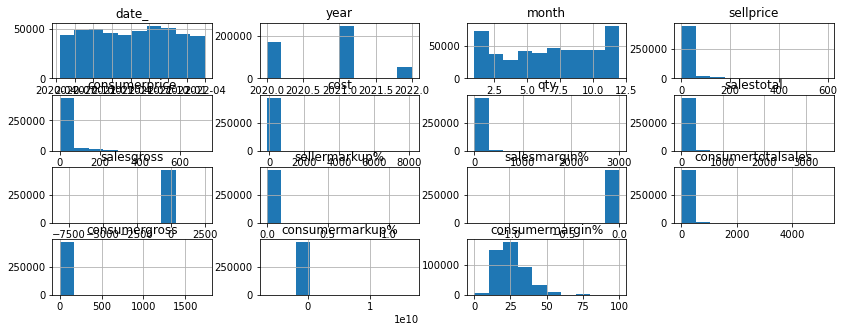

In [87]:
#data overView
data.hist(figsize=(14,5));

In [88]:
data['category'].value_counts()

اكسسوار     318541
مستلزمات    103042
ورقيات       52762
Name: category, dtype: int64

In [89]:
cosmo = data.category =='اكسسوار'
medical = data.category =='مستلزمات'
papers = data.category =='ورقيات'

In [90]:
data[medical].count()

date_                 103042
year                  103042
month                 103042
client                103042
product               103042
invoiceid             103042
category              103042
subcategory           103042
manufacturer          103042
location              103042
sellprice             103042
consumerprice         103042
cost                  103042
qty                   103042
salestotal            103042
salesgross            103042
sellermarkup%         103042
salesmargin%          103042
consumertotalsales    103042
consumergross         103042
consumermarkup%       103042
consumermargin%       103042
dtype: int64

In [91]:
data[papers].count()

date_                 52762
year                  52762
month                 52762
client                52762
product               52762
invoiceid             52762
category              52762
subcategory           52762
manufacturer          52762
location              52762
sellprice             52762
consumerprice         52762
cost                  52762
qty                   52762
salestotal            52762
salesgross            52762
sellermarkup%         52762
salesmargin%          52762
consumertotalsales    52762
consumergross         52762
consumermarkup%       52762
consumermargin%       52762
dtype: int64

In [92]:
data[cosmo].count()

date_                 318541
year                  318541
month                 318541
client                318541
product               318541
invoiceid             318541
category              318541
subcategory           318541
manufacturer          318541
location              318541
sellprice             318541
consumerprice         318541
cost                  318541
qty                   318541
salestotal            318541
salesgross            318541
sellermarkup%         318541
salesmargin%          318541
consumertotalsales    318541
consumergross         318541
consumermarkup%       318541
consumermargin%       318541
dtype: int64

In [93]:
#data[cosmo].mean() , data[medical].mean() , data[papers].mean()

In [94]:
year2020 = data['year'] == 2020
year2021 = data['year'] == 2021
year2022 = data['year'] == 2022

In [ ]:
def attended(data,c_name, xlabel,ylabel):
    plt.figure(figsize=[20,6])
    data[c_name][cosmo].hist(alpha=.5,bins=10,color= 'blue',label='cosmo')
    data[c_name][year2022].hist(alpha=.5,bins=10,color= 'green',label='year')
    plt.legend();
    plt.title(f'cosmo in {c_name} compare')
    plt.xlabel('cosmo')

In [ ]:
   
attended(data,'category',year2022,cosmo)    

In [ ]:
def attended(df,c_name, attend):
    plt.figure(figsize=[15,6])
    df[c_name][cosmo].value_counts(normalize=True).plot(kind='pie',label='show_p',autopct='%1.1f%%')
    plt.legend();
    plt.title(f'patient and {c_name} compare');
    plt.label("")

In [ ]:
attended(df,'category',cosmo)  

In [97]:
for i, v in enumerate(data.columns):
    print(i, v)


0 date_
1 year
2 month
3 client
4 product
5 invoiceid
6 category
7 subcategory
8 manufacturer
9 location
10 sellprice
11 consumerprice
12 cost
13 qty
14 salestotal
15 salesgross
16 sellermarkup%
17 salesmargin%
18 consumertotalsales
19 consumergross
20 consumermarkup%
21 consumermargin%


<AxesSubplot:xlabel='category', ylabel='salesgross'>

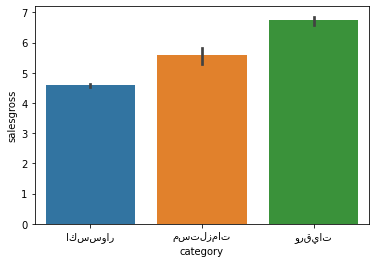

In [103]:
snb.barplot(data=data, x="category",y='salesgross')

In [ ]:
# Plot the total crashes
snb.set_color_codes("pastel")
snb.barplot(x="salesgross", y="salestotal", data=data,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
snb.set_color_codes("muted")
snb.barplot(x="subcategory", y="category", data=data,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
snb.despine(left=True, bottom=True)

TypeError: Neither the `x` nor `y` variable appears to be numeric.